# 線性迴歸範例

In [11]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
# If you are using an old version of IPython, try using '%pylab inline' instead.
# 
# 設定 inline 模式，讓圖片直接在 Ipython 介面顯示
%matplotlib inline

# 引入 numpy, matplotlib.pyplot 模組
import numpy as np
import matplotlib.pyplot as plt

## 產生資料


### 參數設定

| 資料點數目 | X平均 | X標準差 | 誤差平均 | 誤差標準差 |
|---|---|---|---|---|
| 100 | 0.0 | 0.9 | 0.0 | 0.05 |

### 線性模型
  
      y_data = m_data * x + b_data + 誤差項
      
      例：
      m_data = 0.1
      b_data = 0.3



In [12]:
num_data = 100
x_mean   = 0.0
x_std    = 0.9
e_mean   = 0.0
e_std    = 0.05

m_data   = 0.1
b_data   = 0.3

data_pairs = []
X = np.random.normal(
    loc   = x_mean, 
    scale = x_std, 
    size  = (num_data, )
)
err = np.random.normal(
    loc   = e_mean,
    scale = e_std,
    size = (num_data, )
)

Y_data = m_data * X + b_data + err 

## 資料視覺化


### 繪圖設置
* 繪圖：以 X 為橫軸、Y 為縱軸、圖例為紅色圓點
* 軸名：設置橫軸名稱 'X'、縱軸名稱 'Y'
* 標題：Regression

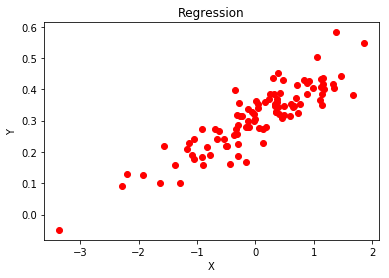

In [13]:
#Graphic display
plt.plot(X, Y_data, 'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regression')
plt.show()

## 初始條件


給定模型初始參數 

m_model ~ Uniform(-1, 1)

b_model = 0.0


##### y_model = m_model * X + b_model

In [14]:
m_model = np.random.uniform(
    low  = -1,
    high = +1
)
b_model = 0.0

Y_model = m_model * X + b_model

## 誤差梯度

* Loss = **誤差平方平均** 

       = sum((Y_model - Y_data)^2) / num_data
     
       = sum((m_model * X + b_model - Y_data)^2) / num_data


* gradient_m = sum(2 (Y_model - Y_data) X) / num_data

* gradient_b = sum(2 (Y_model - Y_data))  / num_data

In [15]:
def squareLossAndGrad(Y_model, Y_data, X):
    loss   = np.mean(  (Y_model - Y_data)**2)
    grad_m = np.mean(2*(Y_model - Y_data)*X)
    grad_b = np.mean(2*(Y_model - Y_data))
    return loss, grad_m, grad_b

## 梯度下降法

* 學習率 LR: 0.5

* m_model = m_model - LR * gradient_m
* b_model = b_model - LR * gradient_b

# 實際執行

* 更新十次參數

* 逐次繪圖，實際資料點為紅點，模型預測為藍線

In [18]:
def gradientDescent(m_now, b_now, grad_m, grad_b):
    LR = 0.5
    m_next = m_now - LR * grad_m
    b_next = b_now - LR * grad_b
    return m_next, b_next

第1次更新，模型：Y = 0.1*X + 0.31 ，誤差：0.00224


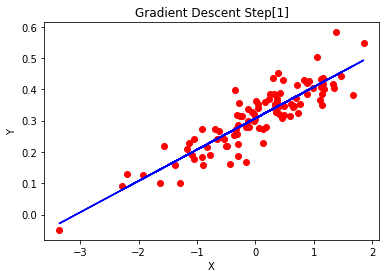

第2次更新，模型：Y = 0.1*X + 0.31 ，誤差：0.00224


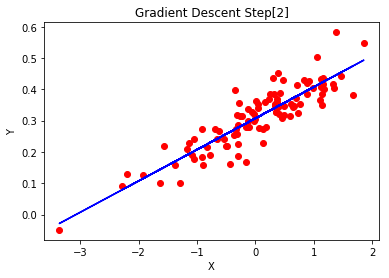

第3次更新，模型：Y = 0.1*X + 0.31 ，誤差：0.00224


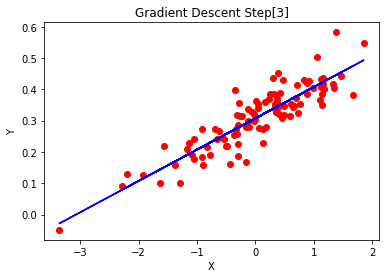

第4次更新，模型：Y = 0.1*X + 0.31 ，誤差：0.00224


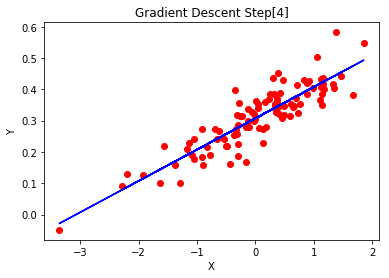

第5次更新，模型：Y = 0.1*X + 0.31 ，誤差：0.00224


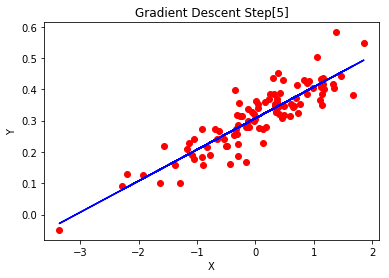

第6次更新，模型：Y = 0.1*X + 0.31 ，誤差：0.00224


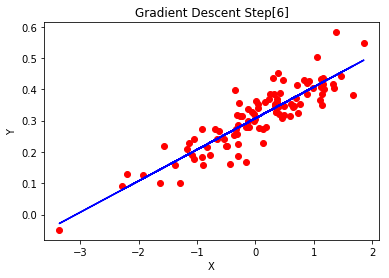

第7次更新，模型：Y = 0.1*X + 0.31 ，誤差：0.00224


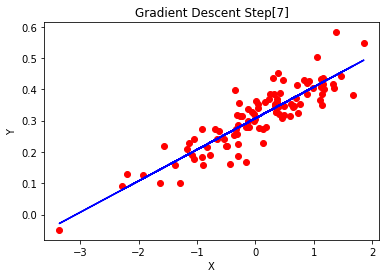

第8次更新，模型：Y = 0.1*X + 0.31 ，誤差：0.00224


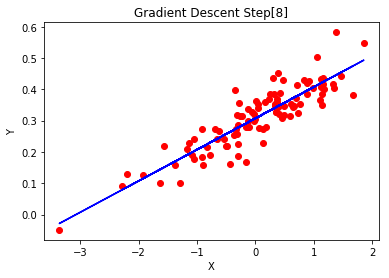

第9次更新，模型：Y = 0.1*X + 0.31 ，誤差：0.00224


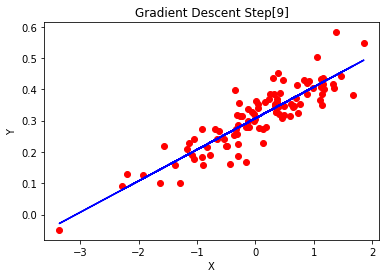

第10次更新，模型：Y = 0.1*X + 0.31 ，誤差：0.00224


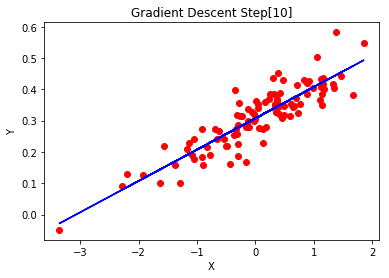

In [22]:
import time
for step in range(10):
    loss, grad_m, grad_b = squareLossAndGrad(Y_model, Y_data, X)
    m_model, b_model = gradientDescent(m_model, b_model, grad_m, grad_b)
    Y_model = m_model * X + b_model
    
    print('第' + str(step+1) + '次更新，模型：Y = '
          + str(round(m_model, 2)) + '*X + '
          + str(round(b_model, 2)) + ' ，誤差：'
          + str(round(loss, 5)))
    
    plt.plot(X, Y_data, 'ro')
    plt.plot(X, Y_model, 'b')
    # plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Gradient Descent Step['+str(step+1)+']')
    plt.show()
    time.sleep(1)

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Generate dataset
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33 # create a y value which is approximately linear but with some random noise

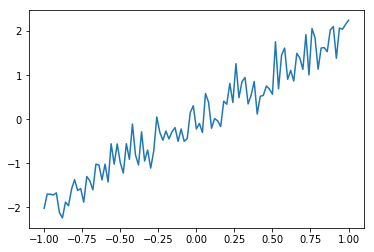

In [3]:
plt.plot(trX, trY)

In [4]:
# Linear regression model
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform', activation='linear'))
model.compile(optimizer='sgd', loss='mse')

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# Print initial weights
weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

Linear regression model is initialized with weight w: 0.05, b: 0.00


In [6]:
# Train
model.fit(trX, trY, nb_epoch=100, verbose=1)

/usr/lib64/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/100
101/101 [==============================] - 0s - loss: 1.3555     
Epoch 2/100
101/101 [==============================] - 0s - loss: 1.2872     
Epoch 3/100
101/101 [==============================] - 0s - loss: 1.2238     
Epoch 4/100
101/101 [==============================] - 0s - loss: 1.1638     
Epoch 5/100
101/101 [==============================] - 0s - loss: 1.0982     
Epoch 6/100
101/101 [==============================] - 0s - loss: 1.0458     
Epoch 7/100
101/101 [==============================] - 0s - loss: 0.9881     
Epoch 8/100
101/101 [==============================] - 0s - loss: 0.9402     
Epoch 9/100
101/101 [==============================] - 0s - loss: 0.9018     
Epoch 10/100
101/101 [==============================] - 0s - loss: 0.8607     
Epoch 11/100
101/101 [==============================] - 0s - loss: 0.8257     
Epoch 12/100
101/101 [==============================] - 0s - loss: 0.7868     
Epoch 13/100
101/101 [==============================] - 0s - 

In [7]:
# Print trained weights
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))

Linear regression model is trained with weight w: 1.87, b: -0.00


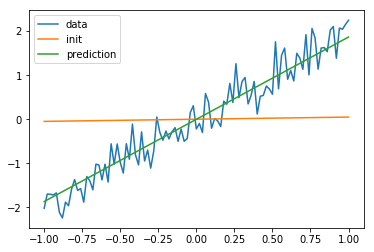

In [8]:
plt.plot(trX, trY, label='data')
plt.plot(trX, w_init*trX + b_init, label='init')
plt.plot(trX, w*trX + b, label='prediction')
plt.legend()
plt.show()